Regra de propagação: $y = f_h [\sum_{i=1}^nw_ix_i - \theta]$

Algoritmo de aprendizagem:

Se um padrão é corretamente classificado:
* $W(t+1) = W(t)$, se $\sum w_ix_i - \theta\geq0$ e $x$ pertence a C1
* $W(t+1) = W(t)$, se $\sum w_ix_i - \theta\lt0$ e $x$ pertence a C2

Se um padrão é incorretamente classificado:
* $W(t+1) = W(t)-\eta x$, se $\sum w_ix_i - \theta\geq0$ e $x$ pertence a C1
* $W(t+1) = W(t)+\eta x$, se $\sum w_ix_i - \theta\lt0$ e $x$ pertence a C2

Usando $\theta=0.5$ e $\eta=0.4$

<!-- Dada uma rede do tipo Perceptron formada por um neurônio com três terminais de entrada, utilizando pesos iniciais $w_0=0.4$, $w_1=-0.6$ e $w_2=0.6$, limiar $\theta=0.5$ e taxa de aprendizado $\eta=0.4$, -->

In [1]:
import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
%matplotlib inline

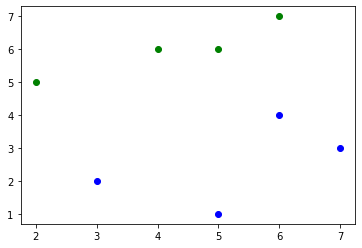

In [2]:
# Static Sample

group_1 = ([5, 6, 3, 7], [1, 4, 2, 3])
group_2 = ([2, 4, 5, 6], [5, 6, 6, 7])

plt.plot(*group_1, 'ro', color='blue')
plt.plot(*group_2, 'ro', color='green')

plt.show()

In [3]:
def evaluate_sample(x, y):
    '''
    returns 1 if sample belongs to group 1 and 0 if it belongs to group 2
    '''
    return 1 if (x > y) else 0

In [4]:
class Neuron(object):
    def __init__(self, cardinality = 2, theta = 0.5, eta = 0.1):
        self.__weights = [random.uniform(-0.5, 0.5) for x in range(cardinality)]
        self.theta = theta
        self.eta = eta
        
    @property
    def weights(self):
        return self.__weights
    
    def iterate(self, sample: list):
        '''
        Faz uma iteração do Neurônio
        '''
        if (len(sample) != len(self.__weights)):
            raise ValueError("A amostra deve ter a mesma quantidde de dimensões do vetor de pesos")
        w = self.__weights
        x = sample
        _sum = sum([x[t]*w[t] for t in range(len(x))]) - self.theta
        y = 1 if (_sum >=0) else 0
        if (evaluate_sample(*x) != y):
            for i in range(len(w)):
                w[i] = w[i] - self.eta*x[i] if y else w[i] + self.eta*x[i]
        return w.copy()
    
    def predict(self, sample: list):
        w = self.__weights
        x = sample
        _sum = sum([x[t]*w[t] for t in range(len(x))]) - self.theta
        return 1 if (_sum >=0) else 0

In [5]:
neuron = Neuron()
counter = 0
threshold = 100

epochs = []
epochs.append(neuron.weights)
while (counter < threshold):
    counter += 1
    samples = (group_1[0] + group_2[0], group_1[1] + group_2[1])
    t = random.randint(0, len(samples[0])-1)
    sample = [samples[0][t], samples[1][t]]
    weights = neuron.iterate(sample)
    epochs.append(weights)


In [6]:
test_samples = ([1, 2, 3, 4, 5], [5, 4, 3, 2, 1])
for t in range(len(test_samples[0])):
    sample = [test_samples[0][t], test_samples[1][t]]
    print(evaluate_sample(*sample) == neuron.predict(sample))

True
True
True
True
True
